# CoMD
CoMD is a reference implementation of typical classical molecular dynamics algorithms and workloads. It is created and maintained by ExMatEx: Exascale Co-Design Center for Materials in Extreme Environments (exmatex.org). The code is intended to serve as a vehicle for co-design by allowing others to extend and/or reimplement it as needed to test performance of new architectures, programming models, etc.

---
## Parameters 
```
Compiler = icc (ICC) 18.0.1 20171018
Build_Flags = -std=c99 -g -O3 -march=native -qopenmp -DDOUBLE
Run_Parameters = -x 128 -y 129 -z 50
```

---
## Scaling

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

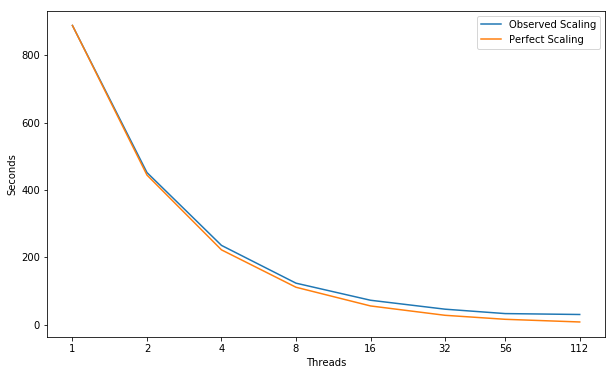

In [2]:
threads = [1, 2, 4, 8, 16, 32, 56, 112]
observedScaling = [889.0, 452.0, 235.5, 123.25, 72.5, 45.9375, 32.857142857142854, 30.178571428571427]
perfectScaling = [889.0, 444.5, 222.25, 111.125, 55.5625, 27.78125, 15.875, 7.9375]
fig, ax = plt.subplots(); ax.set_xscale("log", basex=2); ax.set_xticks(threads)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.plot(threads, observedScaling, label="Observed Scaling")
ax.plot(threads, perfectScaling, label="Perfect Scaling")
ax.legend(); ax.set_xlabel("Threads"); ax.set_ylabel("Seconds")
plt.show()

---
## Performance Improvement

| Threads | 2 | 4 | 8 | 16 | 32 | 56 | 112 |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **Speed Up** | 1.97X | 1.92X | 1.91X | 1.70X | 1.58X | 1.40X | 1.09X |


---
## Cache Miss Scaling

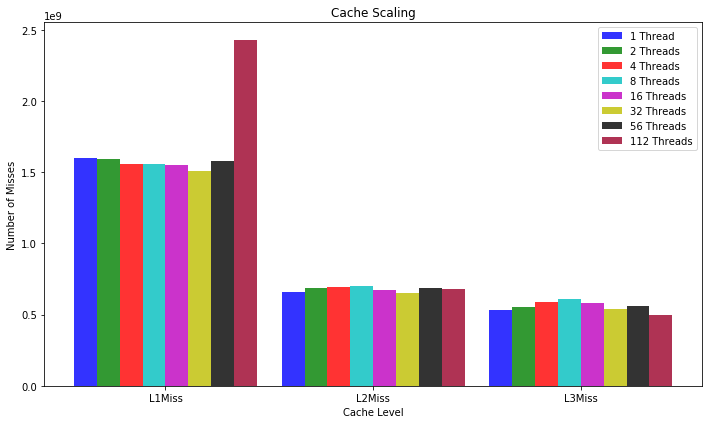

In [3]:
objects = ("L1Miss", "L2Miss", "L3Miss")
index = np.arange(len(objects)); bar_width = 0.11; opacity = 0.8

Thread1 = [1600000000.0, 662000000.0, 530000000.0]
Thread2 = [1590000000.0, 689000000.0, 554000000.0]
Thread4 = [1560000000.0, 691000000.0, 586000000.0]
Thread8 = [1560000000.0, 703000000.0, 610000000.0]
Thread16 = [1550000000.0, 672000000.0, 583000000.0]
Thread32 = [1510000000.0, 655000000.0, 538000000.0]
Thread56 = [1580000000.0, 685000000.0, 557000000.0]
Thread112 = [2430000000.0, 682000000.0, 499000000.0]

plt.bar(index, Thread1, bar_width, alpha=opacity, color="b", label="1 Thread")
plt.bar(index + bar_width, Thread2, bar_width, alpha=opacity, color="g", label="2 Threads")
plt.bar(index + (bar_width * 2), Thread4, bar_width, alpha=opacity, color="r", label="4 Threads")
plt.bar(index + (bar_width * 3), Thread8, bar_width, alpha=opacity, color="c", label="8 Threads")
plt.bar(index + (bar_width * 4), Thread16, bar_width, alpha=opacity, color="m", label="16 Threads")
plt.bar(index + (bar_width * 5), Thread32, bar_width, alpha=opacity, color="y", label="32 Threads")
plt.bar(index + (bar_width * 6), Thread56, bar_width, alpha=opacity, color="k", label="56 Threads")
plt.bar(index + (bar_width * 7), Thread112, bar_width, alpha=opacity, color="#9B0029", label="112 Threads")

plt.xlabel("Cache Level"); plt.ylabel("Number of Misses")
plt.xticks(index + (bar_width*3.5), objects); plt.title("Cache Scaling"); plt.legend()

plt.tight_layout()
plt.show()

---
## Hit Locations

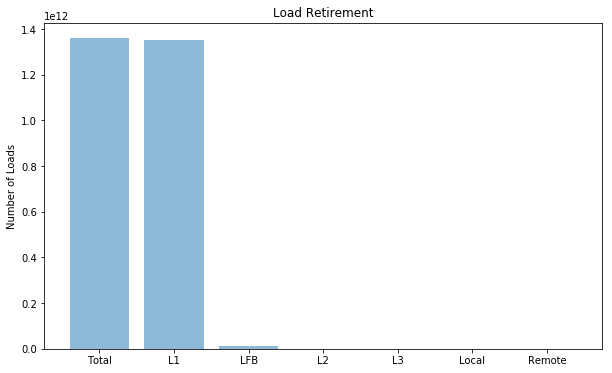

In [5]:
objects = ('Total', 'L1', 'LFB', 'L2', 'L3', 'Local', 'Remote')
y_pos = np.arange(len(objects))
measurements = [1.36e+12, 1.35e+12, 10400000000.0, 920000000.0, 117000000.0, 395521100.917, 161478899.083]

plt.bar(y_pos, measurements, align="center", alpha=0.5)
plt.xticks(y_pos, objects); plt.ylabel("Number of Loads"); plt.title("Load Retirement")

plt.show()


---
## FLOPS
| Double Precision | Scalar | 128B Packed | 256B Packed | 512B Packed | Total FLOPS | GFLOPS/sec |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|
| PMU | 1.750e+12 | 9.130e+06 | 8.810e+07 | 0.000e+00 | 1.750e+12 | 5.327e+01 |
| SDE | 1.843e+12 | 7.252e+06 | 7.986e+07 | 0.000e+00 | 1.843e+12 | 5.609e+01 |

---
### Roofline - Intel(R) Xeon(R) Platinum 8180M CPU
#### 112 Threads - 56 - Cores 3200.0 Mhz
|     GB/sec     |  L1 B/W |  L2 B/W |  L3 B/W | DRAM B/W |
|:---------------|:-------:|:-------:|:-------:|:--------:|
|**1 Thread**    |  159.33 |  91.42 |    47.08 |    21.27|
|**56 Threads**  | 9816.2 | 5579.1 |  1050.00\* |   198.4 |
|**112 Threads** | 9912.56 | 5573.58 |  1050.00\* |   203.13  |
#### \* L3 BW ERT unable to recognize.  Very short plateau ( estimate taken from graph3 )

---
### Intel Software Development Emulator
| Intel SDE | CoMD |
|:---|:---:|
| **Arithmetric Intensity** | 0.177 |
| **FLOPS per Inst** | 0.56 |
| **FLOPS per FP Inst** | 1.0 |
| **Bytes per Load Inst** | 7.95 |
| **Bytes per Store Inst** | 7.89 |
### @NOTE: Not Vectorized

<img src="CoMD.png">

---
## UOPS Executed

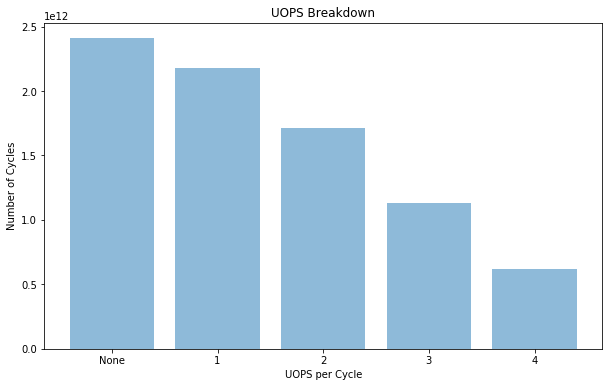

In [7]:
objects = ('None', '1', '2', '3', '4')
y_pos = np.arange(len(objects))
measurements = [2.41e+12, 2.18e+12, 1.71e+12, 1.13e+12, 6.16e+11]

plt.bar(y_pos, measurements, align="center", alpha=0.5)
plt.xticks(y_pos, objects); plt.ylabel("Number of Cycles")
plt.xlabel("UOPS per Cycle"); plt.title("UOPS Breakdown")

plt.show()

### @NOTE: Getting use out of OOO core pipeline

---
## `Experiment Aggregate Metrics`
|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (100.0%)| 1.46 | 1.03 | 1.02 | 0.14% | 49.35% | 80.79% | 0.50% | 2.01% | 2.17% | 0.00% |
|56 (100.0%)| 0.85 | 0.59 | 0.58 | 0.12% | 47.65% | 82.64% | 0.26% | 2.48% | 7.13% | 0.00% |
|112 (100.0%)| 1.07 | 0.38 | 0.37 | 0.15% | 38.68% | 76.07% | 0.43% | 3.22% | 9.09% | 0.00% |

---
## `ljForce`
```c
145 int ljForce(SimFlat* s)
146 {
147    LjPotential* pot = (LjPotential *) s->pot;
148    real_t sigma = pot->sigma;
149    real_t epsilon = pot->epsilon;
150    real_t rCut = pot->cutoff;
151    real_t rCut2 = rCut*rCut;
152 
153    // zero forces and energy
154    real_t ePot = 0.0;
155    s->ePotential = 0.0;
156    int fSize = s->boxes->nTotalBoxes*MAXATOMS;
157    #pragma omp parallel for
158    for (int ii=0; ii<fSize; ++ii)
159    {
160       zeroReal3(s->atoms->f[ii]);
161       s->atoms->U[ii] = 0.;
162    }
163 
164    real_t s6 = sigma*sigma*sigma*sigma*sigma*sigma;
165 
166    real_t rCut6 = s6 / (rCut2*rCut2*rCut2);
167    real_t eShift = POT_SHIFT * rCut6 * (rCut6 - 1.0);
168 
169    int nNbrBoxes = 27;
170 
```
|Threads (Time)| IPC per Core | Loads per Cycle | L1 Hits per Cycle |  L1 Miss Ratio | L2 Miss Ratio | L3 Miss Ratio | L2 B/W Utilized | L3 B/W Utilized |DRAM B/W Utilized| DTLB Miss Rate |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1 (95.4%)| 1.47 | 1.04 | 1.04 | 0.08% | 34.51% | 47.56% | 0.30% | 0.82% | 0.87% | 0.00% |
|56 (58.3%)| 1.20 | 0.84 | 0.84 | 0.07% | 33.20% | 66.07% | 0.21% | 1.38% | 4.06% | 0.00% |
|112 (49.0%)| 1.64 | 0.58 | 0.58 | 0.11% | 34.28% | 57.56% | 0.44% | 2.94% | 8.06% | 0.00% |
```c
171    // loop over local boxes
172    #pragma omp parallel for reduction(+:ePot)
173    for (int iBox=0; iBox<s->boxes->nLocalBoxes; iBox++)
174    {
175       int nIBox = s->boxes->nAtoms[iBox];
176 
177       // loop over neighbors of iBox
178       for (int jTmp=0; jTmp<nNbrBoxes; jTmp++)
179       {
180          int jBox = s->boxes->nbrBoxes[iBox][jTmp];
181 
182          assert(jBox>=0);
183 
184          int nJBox = s->boxes->nAtoms[jBox];
185 
186          // loop over atoms in iBox
187          for (int iOff=MAXATOMS*iBox; iOff<(iBox*MAXATOMS+nIBox); iOff++)
188          {
189 
190             // loop over atoms in jBox
191             for (int jOff=jBox*MAXATOMS; jOff<(jBox*MAXATOMS+nJBox); jOff++)
192             {
193                real3 dr;
194                real_t r2 = 0.0;
195                for (int m=0; m<3; m++)
196                {
197                   dr[m] = s->atoms->r[iOff][m]-s->atoms->r[jOff][m];
198                   r2+=dr[m]*dr[m];
199                }
200 
201                if ( r2 <= rCut2 && r2 > 0.0)
202                {
203 
204                   // Important note:
205                   // from this point on r actually refers to 1.0/r
206                   r2 = 1.0/r2;
207                   real_t r6 = s6 * (r2*r2*r2);
208                   real_t eLocal = r6 * (r6 - 1.0) - eShift;
209                   s->atoms->U[iOff] += 0.5*eLocal;
210                   ePot += 0.5*eLocal;
211 
212                   // different formulation to avoid sqrt computation
213                   real_t fr = - 4.0*epsilon*r6*r2*(12.0*r6 - 6.0);
214                   for (int m=0; m<3; m++)
215                   {
216                      s->atoms->f[iOff][m] -= dr[m]*fr;
217                   }
218                }
219             } // loop over atoms in jBox
220          } // loop over atoms in iBox
221       } // loop over neighbor boxes
222    } // loop over local boxes in system
223 
224    ePot = ePot*4.0*epsilon;
225    s->ePotential = ePot;
226 
227    return 0;
228 }
```

## Compute Bound
### Limited by not being vectorized.  Shows load balancing issues with scaling.  OOO and hyperthreading help with the dependency chain from a long latency instructions (`1.0/r2;`)